In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

Simulacion uav control discreto

In [2]:
# tiempo de muestreo [segundos]
Ts = 0.2

In [38]:
class uav_class:
    # define class
    def __init__(self, x0 = 0, x0_dot = 0, u_lim = 0.1):
        self.x = x0
        self.x_dot = x0_dot
        self.u_lim = u_lim

    # actualiza x_dot 
    def set_x_dot(self, x_dot, Ts):
        # limita el cambio de velocidad a un maximo
        delta_a_max = .05
        delta_a = (x_dot - self.x_dot )/Ts
        if np.abs(delta_a)>delta_a_max:
            delta_a = np.sign(delta_a)*delta_a_max        
        self.x_dot = self.x_dot + Ts*delta_a
        
    def next(self, u, Ts):
        self.x = self.x + self.x_dot*Ts
        self.x_dot = self.x_dot + u*Ts; 
        return self.x, self.x_dot

    def limita_u(self, u):
        uOut = u
        if abs(uOut)>self.u_lim:
            uOut = np.sign(uOut)*self.u_lim
            
        return uOut

    def control_x(self, x_req, x_dot_req, K, Ts, mu=0):
        # posicion y velocidad requerida
        u = 0.0
        e_x     = self.x - x_req
        e_x_dot = self.x_dot - x_dot_req
        
        sigma = K*e_x + e_x_dot
        
        e_v_next = mu * sigma - K*(e_x + Ts*e_x_dot)
        
        uTs = e_v_next - e_x_dot
        u = uTs/Ts
        u = self.limita_u(u)
        return u

    def disp(self):
        print ('x=%.02f' % self.x, ', x_dot=%.02f' % self.x_dot)


In [39]:
N = 2000
x     = np.zeros((N,1), dtype=float)
x_dot = np.zeros((N,1), dtype=float)
x_req     = np.zeros((N,1), dtype=float)
x_dot_req = np.zeros((N,1), dtype=float)
u = np.zeros((N,1), dtype=float)

In [40]:
# obtiene el valor de K dado x0, U
def get_K(x0, u):
    K = np.sqrt(u/(2*x0))
    return K

In [94]:
#crea un objeto uav con valores inciailes
U = .1
x0 = 1
K = get_K(x0,U)
mu = 0.25


### Simulacion

In [95]:
#simulacion
uav   = uav_class(0, 5, U)
buque = uav_class(0, 5, U)

# pto inicial
x    [0] = uav.x
x_dot[0] = uav.x_dot

x_req    [0] = buque.x
x_dot_req[0] = buque.x_dot

for k in range(0,N-1):
    
    #simula un cambio de velocidad inst. del buque
    if k>=500:
        buque.set_x_dot(4,Ts)
    elif k>=100:
        buque.set_x_dot(6,Ts)
    
    # calcula valor de aceleracion segun control
    u[k ] = uav.control_x(x_req[k], x_dot_req[k],K,Ts, mu)
    # modelo uav
    x[k+1], x_dot[k+1] = uav.next(u[k], Ts)    
    # ruido uav
    
    # modelo buque a vel constante
    x_req[k+1], x_dot_req[k+1] = buque.next(0,Ts)
    x_req[k+1]     = x_req[k+1]     + 0.01*np.random.randn()
    x_dot_req[k+1] = x_dot_req[k+1] + 0.01*np.random.randn()
    

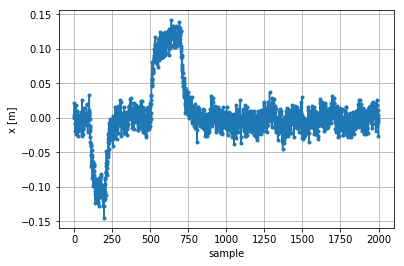

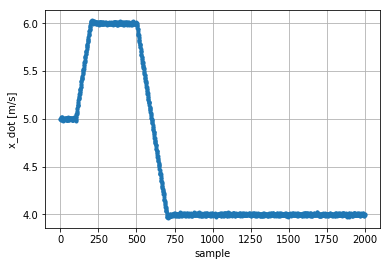

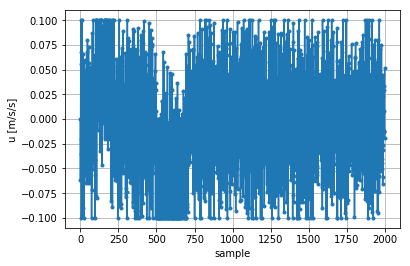

In [96]:
## graficas

# posicion    
plt.figure()
plt.plot(x-x_req,'.-')
plt.xlabel('sample')
plt.ylabel('x [m]')
plt.grid()
# plt.xlim([0, 1])
plt.draw()
plt.savefig('test_1.png')


# velocidad    
plt.figure()
plt.plot(x_dot,'.-')
plt.xlabel('sample')
plt.ylabel('x_dot [m/s]')
plt.grid()
# plt.xlim([0, 1])
plt.draw()
plt.savefig('test_2.png')

# control    
plt.figure()
plt.plot(u[:len(u)-1],'.-')  # excepto el ultimo puto
plt.xlabel('sample')
plt.ylabel('u [m/s/s]')
plt.grid()
# plt.xlim([0, 1])
plt.draw()
plt.savefig('test_2.png')